# Gap Junctions

[![Download JupyterNotebook](https://img.shields.io/badge/Download-Notebook-orange?style=for-the-badge&logo=Jupyter)](https://raw.githubusercontent.com/ANNarchy/ANNarchy.github.io/master/notebooks/GapJunctions.ipynb) [![Download JupyterNotebook](https://img.shields.io/badge/Open_in-Colab-blue?style=for-the-badge&logo=Jupyter)](https://colab.research.google.com/github/ANNarchy/ANNarchy.github.io/blob/master/notebooks/GapJunctions.ipynb)

In [1]:
#!pip install ANNarchy

A simple network with gap junctions.

This is a reimplementation of the Brian example:

http://brian2.readthedocs.org/en/2.0b3/examples/synapses.gapjunctions.html

ANNarchy 5.0 (5.0.0) on darwin (posix).
Compiling network 1...  OK 


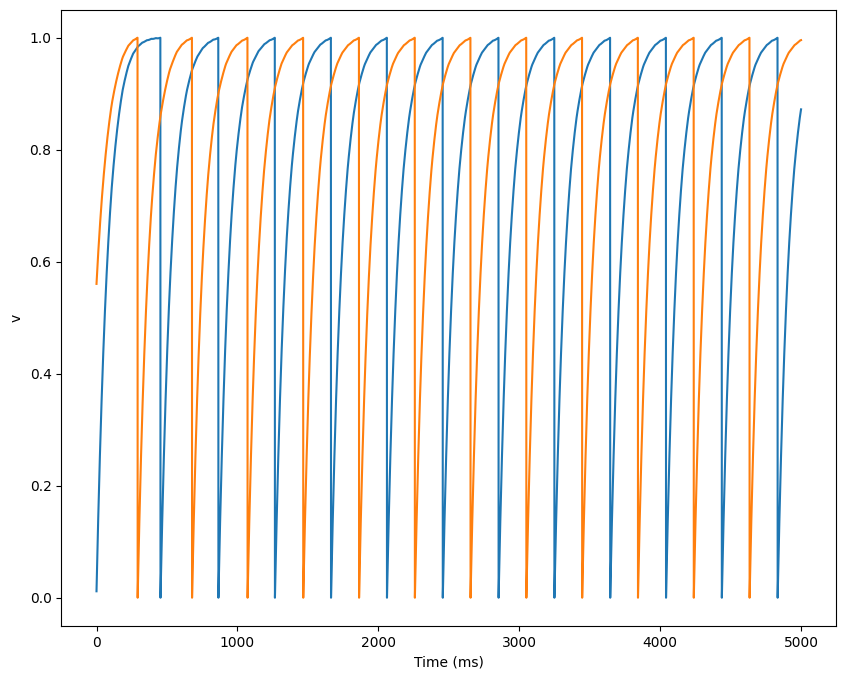

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ANNarchy as ann

neuron = ann.Neuron(
    parameters = dict(v0 = 1.05, tau = 10.0),
    equations = "tau * dv/dt = v0 - v + g_gap",
    spike = "v >  1.",
    reset = "v = 0."
)

gap_junction = ann.Synapse(
    psp = "w * (pre.v - post.v)"
)

net = ann.Network(dt=0.1)
pop = net.create(10, neuron)
pop.v = np.linspace(0., 1., 10)

proj = net.connect(pop, pop, 'gap', gap_junction)
proj.all_to_all(0.02)

trace = net.monitor(pop[0] + pop[5], 'v')

net.compile()

net.simulate(500.)

data = trace.get('v')

plt.figure(figsize=(10, 8))
plt.plot(data[:, 0])
plt.plot(data[:, 1])
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.show()